In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget

# 1.4 Derivada espectral

In [2]:
def f(x):
    return np.multiply(np.exp(-0.1*x),np.sin(x))

In [3]:
def fprime(x):
    return np.multiply(np.exp(-0.1*x),np.cos(x)-0.1*np.sin(x))

In [4]:
def fspectral(x, Fs, N):
    fstep = Fs / N
    freq = np.linspace(-25, (N-1)*fstep-25, int(N))
    
    y = f(t)
    X = np.fft.fft(y)
    freq = np.fft.fftshift(freq)
    
    spectral_derivative = freq*X*(1j)
    return np.real(np.fft.ifft(spectral_derivative))

In [5]:
def fright(x):
    dx = 4*np.pi/100
    fright = np.zeros(len(x))
    
    for i in range(len(x)-1):
        fright[i] = (f(x[i+1])-f(x[i]))/dx
    return fright

In [6]:
Fs = 50 # frecuencia de muestreo
tstep = 4*np.pi/100 #1/Fs
f0 = 5
N = int ( 10 * Fs / f0 ) # Numero de muestras

In [7]:
t = np.linspace(-2*np.pi,(N-1)*tstep-2*np.pi,N)

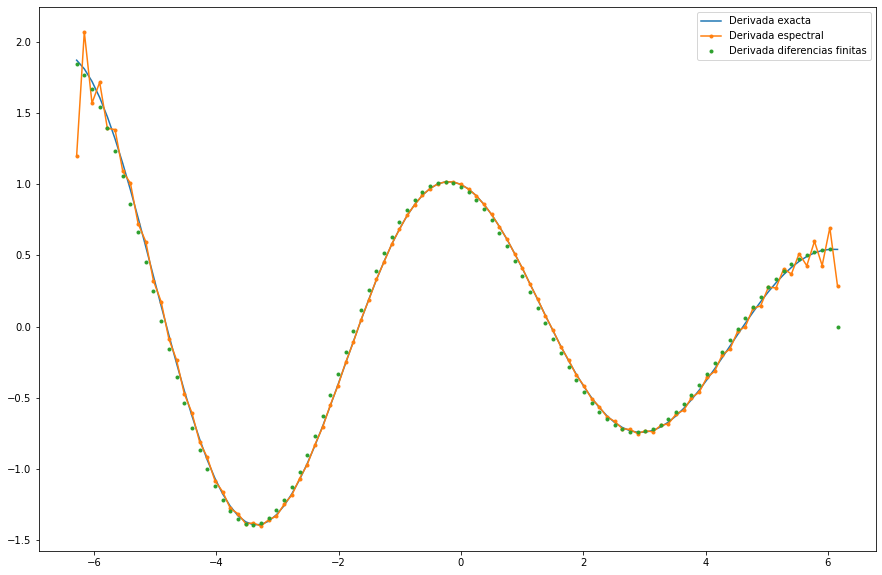

In [8]:
fig = plt.figure(figsize=(15,10))
plt.plot(t, fprime(t), label='Derivada exacta')
plt.plot(t, fspectral(t, Fs, N), '.-', label='Derivada espectral')
plt.plot(t, fright(t), '.', label='Derivada diferencias finitas')

plt.legend()

# 1.5 Manchas solares

In [9]:
file = 'ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

In [10]:
data = np.loadtxt(Path_)

In [11]:
data = data[data[:,0]>1900]
t = data[:,0]
ms = data[:,2]
ms = ms-np.mean(ms)
N = len(ms)

In [12]:
X = np.fft.fft(ms)
XMag = np.abs(X)/len(ms)
freq = np.fft.fftfreq(N)

In [13]:
freq2 = freq[0:int(N/2+1)]
XMag2  = 2.0*XMag[0:int(N/2+1)]

<StemContainer object of 3 artists>

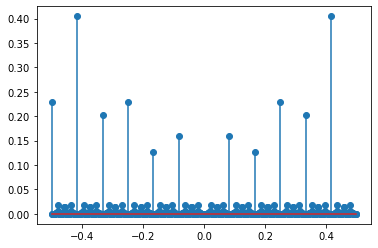

In [14]:
plt.stem(freq, XMag)

<StemContainer object of 3 artists>

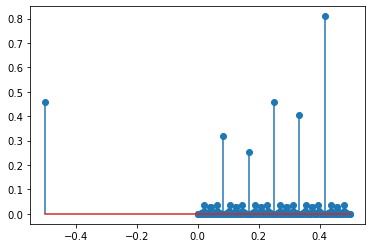

In [15]:
plt.stem(freq2, XMag2)

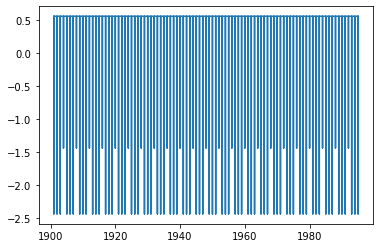

In [91]:
plt.plot(t,ms)

In [45]:
fft = np.fft.fft(ms)
fftmag = np.abs(fft)
N = np.len(ms)
freq = np.fft.fftfreq(N)

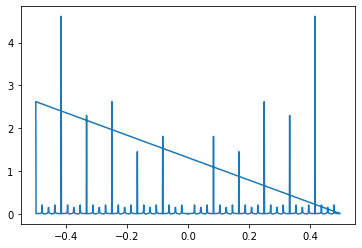

In [71]:
plt.scatter(freq,np.abs(fft/N))

In [48]:
fft[freq<0] = 0
newfreq = np.arange(len(fft))

array([ 0.        ,  0.00087719,  0.00175439, ..., -0.00263158,
       -0.00175439, -0.00087719])

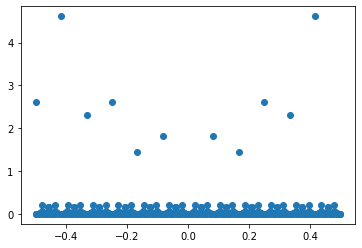

In [72]:
plt.scatter(freq,np.abs(fft/N))

In [69]:
ii = np.argmax(np.abs(fft))
print(freq[ii])

0.4166666666666667


In [70]:
print(1/freq[ii])

2.4


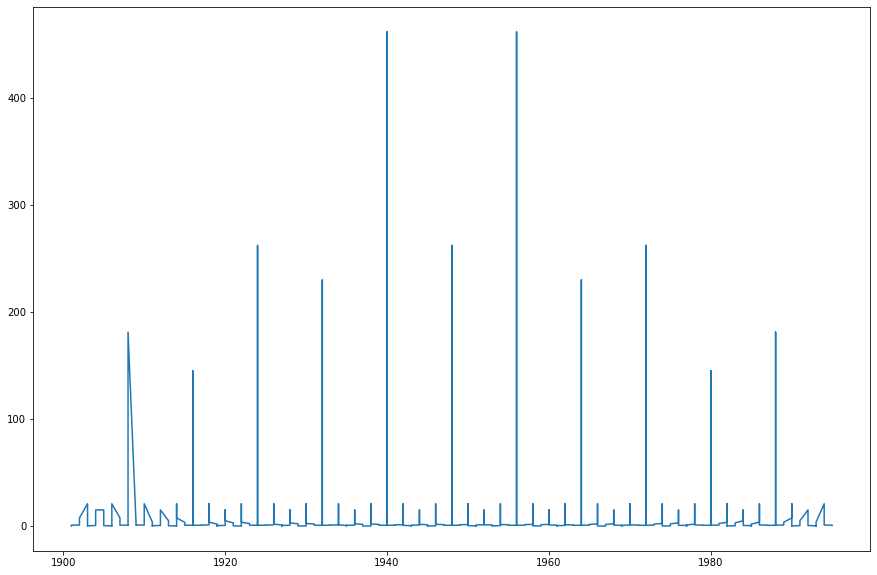

In [51]:
fig = plt.figure(figsize=(15,10))
plt.plot(t,np.abs(fft))
#plt.plot(t,ms)

In [52]:
fft.size

1140

In [54]:
ms.size

1140

In [55]:
freq.size

1140

In [63]:
1/np.mean(np.abs(freq))

4.0

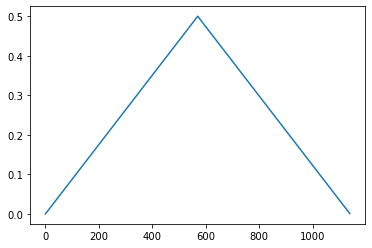

In [62]:
plt.plot(np.abs(freq))

In [60]:
1/np.max(freq)

2.0035149384885766

In [ ]:
plt.plot